**importation des librairies necessaires**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**chargement du jeu de donn√©e**



In [21]:
data = pd.read_csv('/content/drive/MyDrive/timeSerie/Final_Bitcoin_dataset.csv')
data["Date"] = pd.to_datetime(data["Date"])
data.head()

Date        Close         High          Low         Open      Volume  \
0 2019-03-15  3960.911133  3968.542969  3914.015381  3926.663330  9394210605   
1 2019-03-16  4048.725830  4077.036377  3961.657471  3963.900146  9856166973   
2 2019-03-17  4025.229004  4054.122070  4006.411133  4047.719482  8221625400   
3 2019-03-18  4032.507324  4071.556641  4009.117188  4029.968506  9646954186   
4 2019-03-19  4071.190186  4082.216064  4023.812500  4032.691895  9344919956   

   fear_greed  
0        55.0  
1        54.0  
2        58.0  
3        56.0  
4        56.0

**quelques transformations de colonnes**

La **volatilit√©** repr√©sente l‚Äôampleur des fluctuations de prix d‚Äôun actif sur une p√©riode donn√©e.

**Cible secondaire** : On pourrez aussi pr√©dire la volatilit√© future (utile pour les options ou le risque.Les traders se basent sur cette m√©trique pour ajuster leurs strat√©gies).

In [22]:
data['Volatility'] = (data['High'] - data['Low']) / data['Low'] * 100

Le **RSI** est un oscillateur de momentum qui mesure la vitesse et l‚Äôampleur des variations de prix sur une p√©riode donn√©e (g√©n√©ralement 14 jours).
Le RSI n‚Äôest pas simplement une transformation lin√©aire des prix, il capture le **momentum** du march√©, ce qui peut √™tre une information compl√©mentaire pr√©cieuse.

**-->**Si RSI > 70 ‚Üí Bitcoin est en zone de surachat ‚Üí Risque de diminution du prix(Ce qui incite les traders √† vendre).

**-->**Si RSI < 30 ‚Üí Bitcoin est en zone de survente ‚Üí Potentiel rebond haussier(signalant une opportunit√© d'achat potentiel)

**Exemple** :

**~**Si on entra√Æne un mod√®le avec seulement Close, High, Low, Open, il ne comprend que la structure des prix.

**~**Avec RSI comme feature, le mod√®le a une mesure directe de la dynamique du march√©.

In [23]:
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))
data

Date         Close          High           Low          Open  \
0    2019-03-15   3960.911133   3968.542969   3914.015381   3926.663330   
1    2019-03-16   4048.725830   4077.036377   3961.657471   3963.900146   
2    2019-03-17   4025.229004   4054.122070   4006.411133   4047.719482   
3    2019-03-18   4032.507324   4071.556641   4009.117188   4029.968506   
4    2019-03-19   4071.190186   4082.216064   4023.812500   4032.691895   
...         ...           ...           ...           ...           ...   
2188 2025-03-11  82862.210938  83577.757812  76624.250000  78523.875000   
2189 2025-03-12  83722.359375  84358.578125  80635.250000  82857.375000   
2190 2025-03-13  81066.703125  84301.695312  79931.851562  83724.921875   
2191 2025-03-14  83969.101562  85263.289062  80797.562500  81066.992188   
2192 2025-03-15  84300.000000  84647.273438  83708.976562  83989.804688   

           Volume  fear_greed  Volatility        RSI  
0      9394210605        55.0    1.393137        NaN  
1      9856166973        54.0    2.912390        NaN  
2      8221625400        58.0    1.190865        NaN  
3      9646954186        56.0    1.557436        NaN  
4      9344919956        56.0    1.451448        NaN  
...           ...         ...         ...        ...  
2188  54702837196        24.0    9.074814  43.342484  
2189  40353484454        34.0    4.617494  49.230449  
2190  31412940153        45.0    5.466962  45.758951  
2191  29588112414        27.0    5.527056  49.555716  
2192  13801613312        46.0    1.120904  48.037619  

[2193 rows x 9 columns]

Pour calculer la premi√®re valeur du RSI, il faut 14 valeurs de gains et pertes(14 premiers jours).

 Donc, pour les 13 premi√®res lignes, la moyenne mobile ne peut pas √™tre calcul√©e, et elles restent NaN.

# **Colonne**--------**Description**

**Date**	: Date de l'enregistrement des donn√©es (format YYYY-MM-DD).

**Close** : Prix de cl√¥ture du Bitcoin √† cette date.

**High** : Prix le plus haut atteint par le Bitcoin durant cette journ√©e.

**Low** :	Prix le plus bas atteint par le Bitcoin durant cette journ√©e.

**Open** : Prix d'ouverture du Bitcoin √† cette date.

**Volume**	: Volume total de Bitcoin √©chang√© durant cette journ√©e.

**fear_greed** :	Indice de sentiment du march√© bas√© sur la peur et la cupidit√©.

In [25]:
print(data.isnull().sum())

Date           0
Close          0
High           0
Low            0
Open           0
Volume         0
fear_greed     1
Volatility     0
RSI           13
dtype: int64


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2193 non-null   datetime64[ns]
 1   Close       2193 non-null   float64       
 2   High        2193 non-null   float64       
 3   Low         2193 non-null   float64       
 4   Open        2193 non-null   float64       
 5   Volume      2193 non-null   int64         
 6   fear_greed  2192 non-null   float64       
 7   Volatility  2193 non-null   float64       
 8   RSI         2180 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 154.3 KB
None


In [24]:
data.describe().transpose()

count                           mean                  min  \
Date          2193  2022-03-14 23:59:59.999999744  2019-03-15 00:00:00   
Close       2193.0                   34577.254465          3960.911133   
High        2193.0                   35296.671367          3968.542969   
Low         2193.0                   33750.217823          3914.015381   
Open        2193.0                   34542.527953           3926.66333   
Volume      2193.0             31835523422.981304         5331172801.0   
fear_greed  2192.0                      49.855839                  5.0   
Volatility  2193.0                       4.529621             0.359616   
RSI         2180.0                      53.410094             4.699489   

                            25%                  50%                  75%  \
Date        2020-09-13 00:00:00  2022-03-15 00:00:00  2023-09-14 00:00:00   
Close               11584.93457         29176.916016         49368.847656   
High               11800.064453         29498.009766         50797.164062   
Low                11296.993164         28720.271484         47925.855469   
Open               11548.719727         29169.074219         49413.480469   
Volume            18927080224.0        27773333680.0        39006849170.0   
fear_greed                 30.0                 50.0                 70.0   
Volatility             2.307852             3.653107             5.590037   
RSI                    40.76242            52.581676            65.973856   

                            max                 std  
Date        2025-03-15 00:00:00                 NaN  
Close             106146.265625        24341.695149  
High              109114.882812        24846.611684  
Low               105291.734375        23769.740067  
Open              106147.296875        24329.020512  
Volume           350967941479.0  19321455743.148724  
fear_greed                 95.0           22.051954  
Volatility            63.138656            3.680877  
RSI                   99.219494           18.076001

**.Close** (Prix de Cl√¥ture) :

**~**Moyenne : 34 577 $ (Prix moyen du Bitcoin sur la p√©riode).

**~**√âtendue : De 3960 √† 106146 $ montrant une forte volatilit√© historique.

**~**√âcart-type : 24 341 $, indiquant une grande dispersion autour de la moyenne.

**.Volume**

**~**Moyenne : Le volume moyen des transactions est de 31,835,520,000 (environ 31.8 milliards).

**~**Min : Le volume minimum est 5.33 milliards, ce qui repr√©sente probablement une p√©riode de faible activit√©.

**~**Max : Le volume maximum est de 350.97 milliards, indiquant des pics d'activit√© importants(Le 26 f√©vrier 2021, le march√© du Bitcoin a connu une volatilit√© notable, marqu√©e par une baisse significative de son prix. Cette chute est survenue dans un contexte o√π, quelques jours auparavant, le Bitcoin avait atteint un nouveau record en d√©passant les 50¬†000¬†dollars le 16 f√©vrier 2021.

**.Volatility** (Volatilit√© Journali√®re)

**~**Moyenne : 4.53% (variation journali√®re moyenne entre High et Low).

**~**Max : 63.13% (journ√©e de trading extr√™mement volatile).

Ce jour correspond au 12 mars 2020, surnomm√© le **jeudi noir** dans la communaut√© des cryptomonnaies, le Bitcoin a subi une chute spectaculaire de pr√®s de 50¬†% de sa valeur en une seule journ√©e. Le prix du Bitcoin est pass√© d'environ 7¬†900¬†dollars √† 4¬†860¬†dollars, refl√©tant une panique g√©n√©ralis√©e sur les march√©s financiers d√ªe √† la pand√©mie de **Covid-19**

In [12]:
for lag in [1, 3, 7, 15, 30, 60, 61, 70]:
    data[f'fear_greed_lag_{lag}'] = data['fear_greed'].shift(lag)
    correlation_lag = data[['Close', f'fear_greed_lag_{lag}']].corr()
    print(f"Corr√©lation avec un d√©calage de {lag} jours :\n", correlation_lag, "\n")


Corr√©lation avec un d√©calage de 1 jours :
                      Close  fear_greed_lag_1
Close             1.000000          0.330613
fear_greed_lag_1  0.330613          1.000000 

Corr√©lation avec un d√©calage de 3 jours :
                      Close  fear_greed_lag_3
Close             1.000000          0.335399
fear_greed_lag_3  0.335399          1.000000 

Corr√©lation avec un d√©calage de 7 jours :
                      Close  fear_greed_lag_7
Close             1.000000          0.346384
fear_greed_lag_7  0.346384          1.000000 

Corr√©lation avec un d√©calage de 15 jours :
                       Close  fear_greed_lag_15
Close              1.000000           0.367282
fear_greed_lag_15  0.367282           1.000000 

Corr√©lation avec un d√©calage de 30 jours :
                       Close  fear_greed_lag_30
Close              1.000000           0.396577
fear_greed_lag_30  0.396577           1.000000 

Corr√©lation avec un d√©calage de 60 jours :
                       Close  f

**Visualisation**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
def process_and_plot_timeseries(df):
    # V√©rification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en format datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Trier les donn√©es par date pour √©viter des erreurs d'affichage
    df = df.sort_values(by='Date')
    # Colonnes √† tracer
    primary_columns = ['Close', 'High', 'Low', 'Open', 'fear_greed', 'Volatility', 'RSI']  # √âchelle normale
    secondary_columns = ['Volume']  # √âchelle secondaire (grandes valeurs)
    # V√©rification des colonnes
    missing_cols = [col for col in primary_columns + secondary_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Cr√©ation du graphique avec un axe secondaire
    fig, ax1 = plt.subplots(figsize=(14, 7))
    # Trac√© des variables principales
    for col in primary_columns:
        ax1.plot(df['Date'], df[col], label=col, alpha=0.7)
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Valeurs (prix, indicateurs)")
    ax1.tick_params(axis='y')
    # Cr√©ation d'un deuxi√®me axe Y pour les variables volumineuses
    ax2 = ax1.twinx()
    for col in secondary_columns:
        ax2.plot(df['Date'], df[col], label=col, linestyle="dashed", alpha=0.7, color='red')
    ax2.set_ylabel("Volume")
    ax2.tick_params(axis='y', colors='red')
    # Ajout des l√©gendes
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.title("√âvolution des indicateurs financiers au fil du temps")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

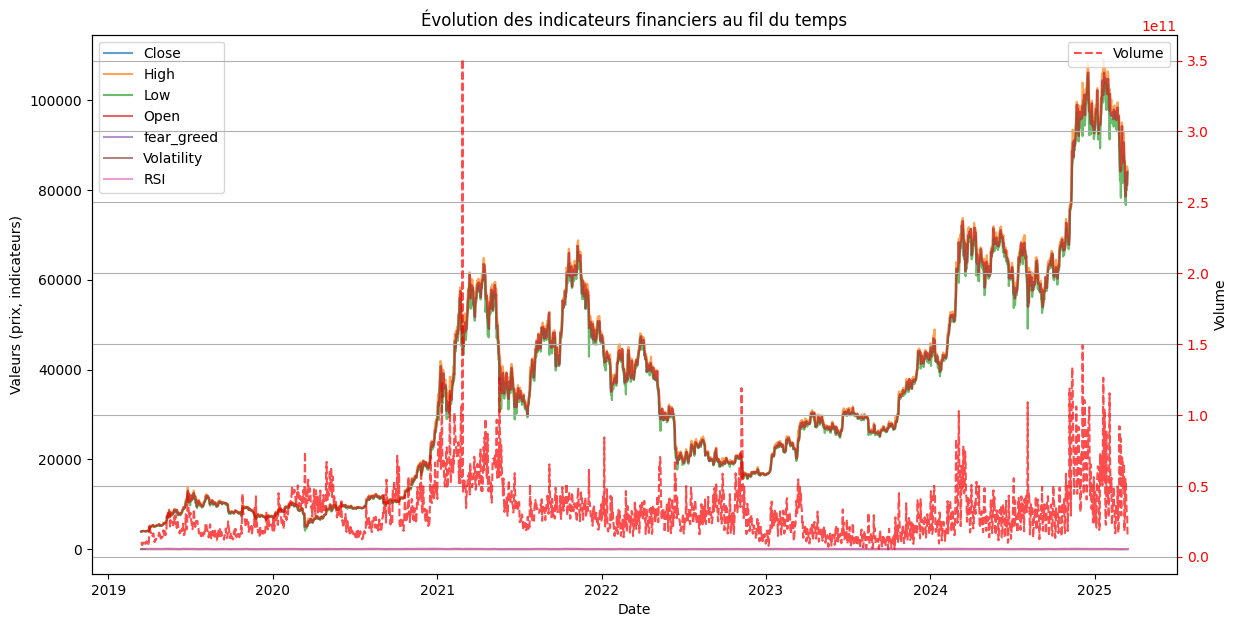

None


In [42]:
resultat=process_and_plot_timeseries(data)
print(resultat)

**INTERPRETATION**

**Interpr√©tation des graphes :**

Caract√©ristiques **'High'**, **'Low'**, **'Open'**, **'Close'** : Sur le graphique, nous observons que ces quatre caract√©ristiques √©voluent de mani√®re presque identique au cours du temps (de 2019 √† 2025). Cette similarit√© sugg√®re une forte corr√©lation entre elles, ce qui est tout √† fait logique dans le contexte des prix financiers. Les variations de **"High"** (le plus haut prix), **"Low"** (le plus bas prix), **"Open"** (le prix d'ouverture) et **"Close"** (le prix de cl√¥ture) sont proportionnelles, car elles sont directement li√©es √† l'√©volution du prix du Bitcoin. L'√©volution de ces quatre variables est tr√®s semblable car elles sont intrins√®quement li√©es et suivent des dynamiques similaires sur les p√©riodes de march√©.

**RSI (Relative Strength Index)** : La courbe du RSI montre une √©volution tr√®s diff√©rente de celle des prix, avec une relative stabilit√© au fil du temps. En effet, contrairement aux autres indicateurs qui suivent les variations des prix du Bitcoin, le RSI semble capturer un aspect plus sous-jacent du march√©. Ce qui est int√©ressant ici, c'est que bien que le prix du Bitcoin fluctue, le RSI reste stationnaire, indiquant que l'indice de force relative reste stable. Cela peut sugg√©rer que le RSI se comporte davantage comme un indicateur de momentum. Il transforme les prix lin√©airement et capte des informations sur la force ou la faiblesse des mouvements de prix, offrant ainsi un aper√ßu de l'inertie du march√© plut√¥t que de la direction actuelle des prix.

**Volatilit√©** : Cette  caract√©ristique pourrait √©galement indiquer l'activit√© du march√©, mais dans notre cas elle montre des comportements diff√©rents en fonction de la dynamique de trading. En analysant de mani√©re detaill√©e la volatilit√© , nous  pouvez obtenir des informations suppl√©mentaires sur l'intensit√© des fluctuations et l'engagement des traders au fil du temps.

**Analyse univari√©e**

In [30]:
def process_and_plot_histograms(df):
    # V√©rification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en type datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Colonnes num√©riques √† visualiser
    numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility', 'RSI']
    # V√©rification si toutes les colonnes existent
    missing_cols = [col for col in numeric_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Cr√©ation des histogrammes avec statistiques et polygone de fr√©quence
    plt.figure(figsize=(12, 10))
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(3, 3, i)  # 3 lignes, 3 colonnes pour les subplots
        data = df[col].dropna()
        # Histogramme
        counts, bins, _ = plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=False)
        # Polygone de fr√©quence
        bin_centers = (bins[:-1] + bins[1:]) / 2
        plt.plot(bin_centers, counts, marker='o', linestyle='-', color='red', label='Polygone de fr√©quence')
        # Calcul des statistiques
        mean_value = np.mean(data)
        std_dev = np.std(data)
        variance = np.var(data)
        median_value = np.median(data)
        min_value = np.min(data)
        max_value = np.max(data)
        # Ajout des statistiques sur le graphe
        stats_text = (f"Moyenne: {mean_value:.2f}\n√âcart-type: {std_dev:.2f}\nVariance: {variance:.2f}\n"
                      f"M√©diane: {median_value:.2f}\nMin: {min_value:.2f}\nMax: {max_value:.2f}")
        plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
                 verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7))
        plt.title(f'Histogramme de {col}')
        plt.xlabel(col)
        plt.ylabel('Fr√©quence')
        plt.legend()
    plt.tight_layout()
    plt.show()


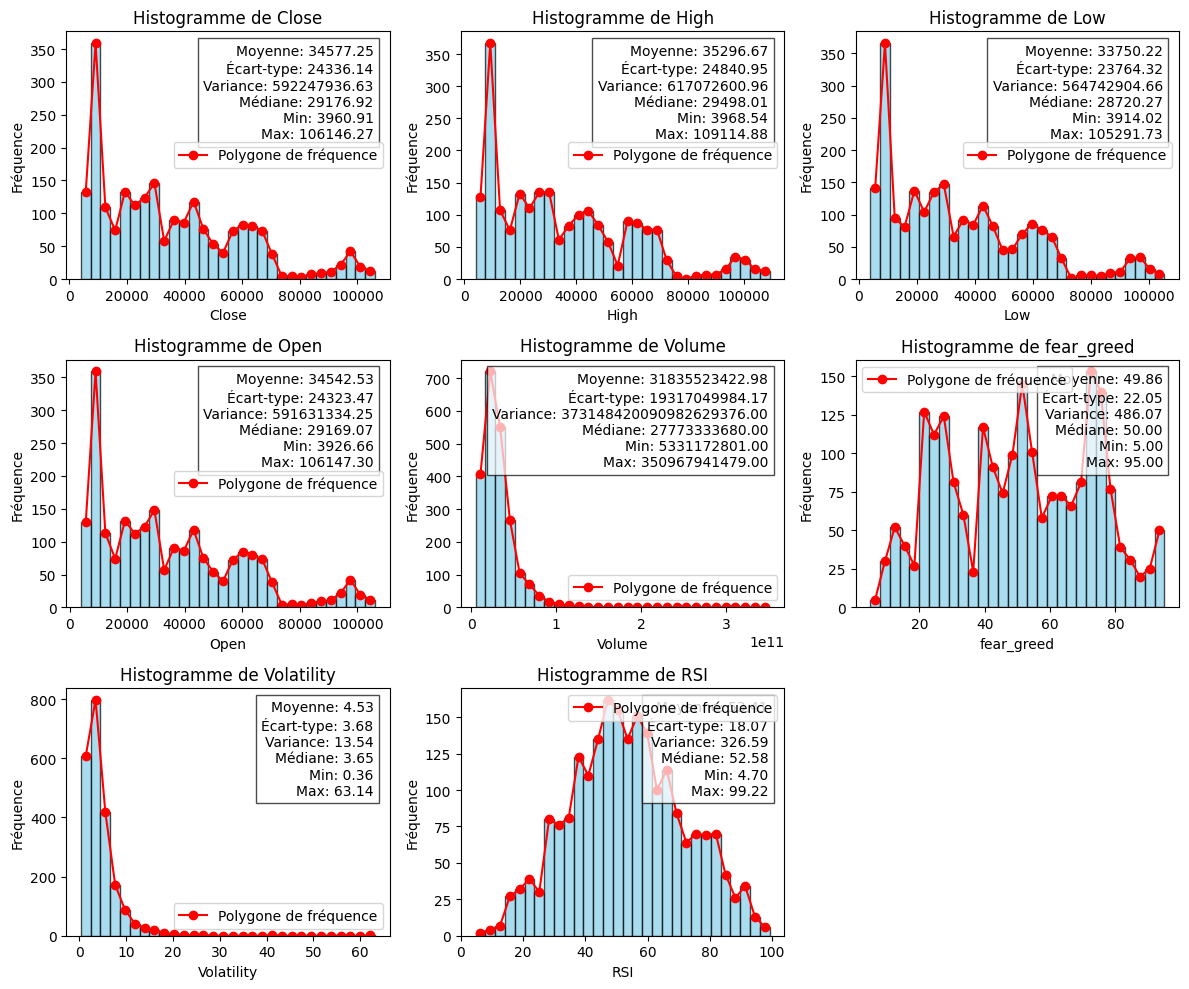

None


In [28]:
result = process_and_plot_histograms(data)
print(result)

**INTERPRETATION**

Les polygones de fr√©quence des colonnes Close, High, Low, et Open sont pratiquement identiques, ce qui refl√®te une distribution similaire de ces variables. Ce ph√©nom√®ne se v√©rifie tant graphiquement qu'√† travers les calculs statistiques, car leurs moyennes, √©carts-types, valeurs minimales, maximales, m√©dianes, et variances sont presque identiques.

De plus, toutes ces colonnes pr√©sentent une distribution asym√©trique, √† l'exception de la colonne fear_greed. En effet, pour cette derni√®re, la m√©diane est √©gale √† 50 et la moyenne (ou esp√©rance) est de 49,86. Bien que le mode ne soit pas calcul√© ici, on peut en d√©duire que la distribution de fear_greed est relativement sym√©trique, puisque la m√©diane, la moyenne et le mode se trouvent tr√®s proches l'un de l'autre.En outre ,la distribution de RSI est aussi approximativement symetrique car elle a une moyenne de 53.41 et une mediane de 52.58 .

In [19]:
print(data.columns)
print(len(data.columns))

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed',
       'Volatility', 'RSI', 'fear_greed_lag_1', 'fear_greed_lag_3',
       'fear_greed_lag_7', 'fear_greed_lag_15', 'fear_greed_lag_30',
       'fear_greed_lag_60', 'fear_greed_lag_61', 'fear_greed_lag_70'],
      dtype='object')
17


**üìà Le sentiment du march√© (Fear & Greed) semble avoir un effet retard√© sur le prix du Bitcoin, avec un d√©lai optimal d‚Äôenviron 30 jours. C'est √† dire que son impact met plusieurs jours √† se r√©percuter sur le march√© !**

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Prix Bitcoin
fig.add_trace(
    go.Scatter(x=data['Date'], y=data['Close'], name="Bitcoin Price", line=dict(color='blue')),
    secondary_y=False,
)

# Fear & Greed
fig.add_trace(
    go.Scatter(x=data['Date'], y=data['fear_greed'], name="Fear & Greed", line=dict(color='red', dash='dot')),
    secondary_y=True,
)

fig.update_layout(
    title="Bitcoin Price vs Fear & Greed Index",
    hovermode="x unified"  # Affiche les deux valeurs au survol
)

fig.show()

Le **RobustScaler** est une m√©thode de normalisation des donn√©es particuli√®rement adapt√©e aux jeux de donn√©es contenant des outliers comme les donn√©es financi√®res.

**Principe :**

**-->**Centre les donn√©es autour de la m√©diane (au lieu de la moyenne pour StandardScaler).

**-->**Met √† l'√©chelle en utilisant l'√©cart interquartile (IQR) (au lieu de l'√©cart-type).

In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

features_to_scale = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility']

data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

<Axes: >

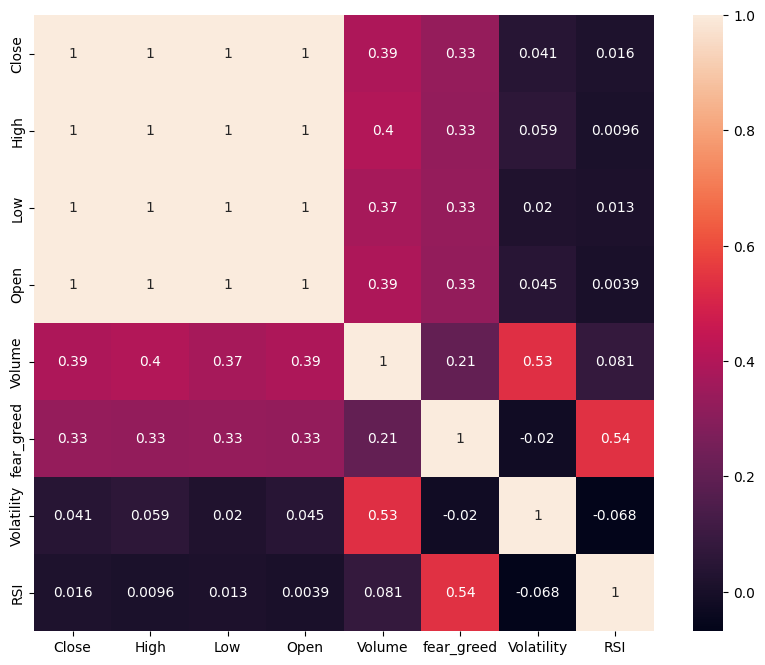

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility', 'RSI']].corr(), annot=True)

**Corr√©lations entre les prix (Close, High, Low, Open) :**

Les prix de cl√¥ture(target variable), les prix les plus √©lev√©s(High), les prix les plus bas(Low) et les prix d'ouverture(Open) sont fortement corr√©l√©s . Cela est logique, car les prix des actifs financiers ont tendance √† √©voluer ensemble.

**Corr√©lations avec le volume :**

**~**Le volume a une corr√©lation mod√©r√©e (0.37 √† 0.4) avec les prix. Cela sugg√®re que les variations de prix sont souvent accompagn√©es de changements de volume.

**~**Le volume a une corr√©lation assez forte (0.53) avec la volatilit√©.Cela signifie que les p√©riodes de forte volatilit√© sont souvent associ√©es √† un volume de transactions √©lev√© (logique car les investisseurs s'empressent de vendre leurs actifs).

**Corr√©lations avec l'indice fear_greed :**

**~**L'indice fear_greed a une corr√©lation de 0.33 avec le prix de l'actif. Il y a donc une l√©g√®re influence du sentiment du march√© sur le prix(mais pas **instantan√©ment**).

**Corr√©lation avec la volatilit√© :**

**~**La volatilit√© a une faible corr√©lation (0.02 √† 0.059) avec les prix. Cela indique que les changements de prix ne sont pas forc√©ment en rapport avec la volatilit√©.